In [1]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#newdf=pd.read_csv('/content/Dataset-cleaned-groupedbydistricts (1).csv')
newdf=pd.read_csv('Data.csv')
newdf

,Unnamed: 0,Location (District),Population,Installed Capacity (MW),Latitude,Longitude,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption in KWh,Solar Rad Monthly,Solar Rad Annual,poa monthly,allsky_insolation
0,0,Aalo,NaN,0.05,28.170120,94.798230,4.00,703.0,"[3.999358654022217, 3.6590754985809326, 3.6333...",4.204289,"[123.98011779785156, 102.45411682128906, 112.6...","[3.36, 3.46, 3.39, 3.31, 3.27]"
1,1,Abali,NaN,0.01,30.458560,78.250090,4.00,703.0,"[5.87696647644043, 5.861727237701416, 6.584075...",5.881289,"[182.1859588623047, 164.12835693359375, 204.10...","[4.68, 4.69, 4.6, 4.68, 4.46]"
2,3,Adilabad,NaN,228.00,19.666670,78.533330,9.50,1896.0,"[6.148787975311279, 6.589134216308594, 6.79743...",5.831581,"[190.6124267578125, 184.49575805664062, 210.72...","[5.17, 5.07, 5.14, 5.02, 4.98]"
3,4,Agar Malwa,NaN,58.77,23.825024,76.072969,6.50,1084.0,"[5.8297810554504395, 6.8476409912109375, 7.099...",5.992356,"[180.72320556640625, 191.73394775390625, 220.0...","[4.98, 5.02, 5.02, 4.98, 4.76]"
4,5,Ahmedabad,NaN,10.51,23.027760,72.600270,5.00,2378.0,"[6.179914951324463, 6.704948425292969, 7.12015...",6.023422,"[191.57736206054688, 187.73855590820312, 220.7...","[5.34, 5.22, 5.26, 5.23, 5.16]"
...,...,...,...,...,...,...,...,...,...,...,...,...
278,305,mukatsar sahib,NaN,2.00,30.297968,74.540631,7.30,2046.0,"[4.280056476593018, 5.305939197540283, 6.57693...",5.652767,"[132.68174743652344, 148.56629943847656, 203.8...","[4.74, 4.85, 4.88, 4.82, 4.63]"
279,306,sangrur,NaN,2.50,30.246080,75.846860,7.30,2046.0,"[4.1143412590026855, 5.412136077880859, 6.4589...",5.530841,"[127.5445785522461, 151.53981018066406, 200.22...","[4.78, 4.86, 4.86, 4.84, 4.67]"
280,307,siang,NaN,0.01,22.600000,83.050000,4.00,703.0,"[5.998735427856445, 6.5158185958862305, 6.8137...",5.672237,"[185.96080017089844, 182.4429168701172, 211.22...","[4.89, 4.87, 4.94, 4.93, 4.78]"
281,308,"sodhiaya, zirakpur",NaN,1.25,30.658350,76.820920,7.30,2046.0,"[4.3935980796813965, 5.415832996368408, 6.3008...",5.663244,"[136.2015380859375, 151.64332580566406, 195.32...","[4.8, 4.88, 4.88, 4.85, 4.68]"


In [ ]:
count=0
for index,row in newdf.iterrows():
  print(row['allsky_insolation'])

[3.36, 3.46, 3.39, 3.31, 3.27]
[4.68, 4.69, 4.6, 4.68, 4.46]
[5.17, 5.07, 5.14, 5.02, 4.98]
[4.98, 5.02, 5.02, 4.98, 4.76]
[5.34, 5.22, 5.26, 5.23, 5.16]
[5.26, 5.27, 5.27, 5.2, 5.11]
[4.77, 4.65, 4.85, 4.77, 4.57]
[4.9, 4.87, 4.87, 4.83, 4.72]
[5.28, 5.17, 5.22, 5.21, 5.07]
[4.66, 4.77, 4.76, 4.76, 4.57]
[5.32, 5.19, 5.27, 5.24, 5.12]
[5.32, 5.19, 5.27, 5.24, 5.12]
[5.51, 5.44, 5.48, 5.54, 5.39]
[5.15, 4.97, 5.08, 5.0, 4.85]
[5.31, 5.47, 5.27, 5.25, 5.3]
[5.1, 5.02, 4.96, 5.05, 5.0]
[5.46, 5.61, 5.5, 5.19, 5.3]
[4.99, 5.02, 5.07, 5.0, 4.79]
[5.2, 5.08, 5.17, 5.08, 4.98]
[5.24, 5.3, 5.14, 5.22, 5.2]
[4.8, 4.88, 4.88, 4.85, 4.68]
[5.27, 5.17, 5.23, 5.18, 5.03]
[4.74, 4.9, 4.81, 4.82, 4.64]
[5.34, 5.14, 5.29, 5.18, 5.14]
[4.98, 4.98, 5.01, 4.9, 4.91]
[5.27, 5.21, 5.23, 5.19, 5.14]
[4.78, 4.65, 4.86, 4.77, 4.6]
[5.15, 4.97, 5.08, 5.0, 4.85]
[5.45, 5.45, 5.37, 5.47, 5.4]
[4.91, 4.89, 4.92, 4.77, 4.77]
[5.0, 4.99, 5.05, 5.0, 4.88]
[5.47, 5.45, 5.43, 5.47, 5.37]
[5.04, 5.01, 5.06, 4.98, 4.83

## Data Processing

Function to Compute Average of List

In [3]:
def Average(lst): 
    return sum(lst) / len(lst) 

poa monthly and all sky insolation are array strings, so for using in models we need to first  do some processing to convert into float and then take the average.

In [4]:
poamonthlyavg=[]
for i,row in newdf.iterrows():
  temp=row['poa monthly']
  str1 = temp.replace(']','').replace('[','')
  l = str1.replace('"','').split(",")
  l = list(map(float, l))
  poamonthlyavg.append(Average(l))
newdf['Avg Poa Monthly']=poamonthlyavg

In [5]:
allskyavg=[]
for i,row in newdf.iterrows():
  temp=row['allsky_insolation']
  str1 = temp.replace(']','').replace('[','')
  l = str1.replace('"','').split(",")
  l = list(map(float, l))
  allskyavg.append(Average(l))
newdf['allsky_insolation']=allskyavg

In [6]:
cols=['Installed Capacity (MW)','Average domestic electricity rates in Rs./KWh','Per capita electricity consumption in KWh','Solar Rad Annual','Avg Poa Monthly']

In [ ]:
temp = newdf['poa monthly'].iloc[0]
str1 = temp.replace(']','').replace('[','')
l = str1.replace('"','').split(",")
l = list(map(float, l))
print(Average(l))

128.00621032714844


In [7]:
newdf[['Avg Poa Monthly','Solar Rad Annual']]=newdf[['Avg Poa Monthly','Solar Rad Annual']].apply(pd.to_numeric)

In [8]:
newdf.dtypes

Unnamed: 0                                         int64
Location (District)                               object
Population                                       float64
Installed Capacity (MW)                          float64
Latitude                                         float64
Longitude                                        float64
Average domestic electricity rates in Rs./KWh    float64
Per capita electricity consumption in KWh        float64
Solar Rad Monthly                                 object
Solar Rad Annual                                 float64
poa monthly                                       object
allsky_insolation                                float64
Avg Poa Monthly                                  float64
dtype: object

In [9]:
newdf

,Unnamed: 0,Location (District),Population,Installed Capacity (MW),Latitude,Longitude,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption in KWh,Solar Rad Monthly,Solar Rad Annual,poa monthly,allsky_insolation,Avg Poa Monthly
0,0,Aalo,NaN,0.05,28.170120,94.798230,4.00,703.0,"[3.999358654022217, 3.6590754985809326, 3.6333...",4.204289,"[123.98011779785156, 102.45411682128906, 112.6...",3.358,128.006210
1,1,Abali,NaN,0.01,30.458560,78.250090,4.00,703.0,"[5.87696647644043, 5.861727237701416, 6.584075...",5.881289,"[182.1859588623047, 164.12835693359375, 204.10...",4.622,178.823427
2,3,Adilabad,NaN,228.00,19.666670,78.533330,9.50,1896.0,"[6.148787975311279, 6.589134216308594, 6.79743...",5.831581,"[190.6124267578125, 184.49575805664062, 210.72...",5.076,177.183739
3,4,Agar Malwa,NaN,58.77,23.825024,76.072969,6.50,1084.0,"[5.8297810554504395, 6.8476409912109375, 7.099...",5.992356,"[180.72320556640625, 191.73394775390625, 220.0...",4.952,182.013898
4,5,Ahmedabad,NaN,10.51,23.027760,72.600270,5.00,2378.0,"[6.179914951324463, 6.704948425292969, 7.12015...",6.023422,"[191.57736206054688, 187.73855590820312, 220.7...",5.242,183.015671
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,305,mukatsar sahib,NaN,2.00,30.297968,74.540631,7.30,2046.0,"[4.280056476593018, 5.305939197540283, 6.57693...",5.652767,"[132.68174743652344, 148.56629943847656, 203.8...",4.784,171.950844
279,306,sangrur,NaN,2.50,30.246080,75.846860,7.30,2046.0,"[4.1143412590026855, 5.412136077880859, 6.4589...",5.530841,"[127.5445785522461, 151.53981018066406, 200.22...",4.802,168.179098
280,307,siang,NaN,0.01,22.600000,83.050000,4.00,703.0,"[5.998735427856445, 6.5158185958862305, 6.8137...",5.672237,"[185.96080017089844, 182.4429168701172, 211.22...",4.882,172.343159
281,308,"sodhiaya, zirakpur",NaN,1.25,30.658350,76.820920,7.30,2046.0,"[4.3935980796813965, 5.415832996368408, 6.3008...",5.663244,"[136.2015380859375, 151.64332580566406, 195.32...",4.818,172.205873


In [10]:
cols2=['Installed Capacity (MW)']
cols3=['Average domestic electricity rates in Rs./KWh','Per capita electricity consumption in KWh','Solar Rad Annual','Avg Poa Monthly','allsky_insolation']

## Unsupervised Methods for Labelling (KMeans and DBScan)

In [11]:
data=newdf[cols2]
data.head()
X = StandardScaler().fit_transform(data)
X

array([[-3.69669622e-01],
       [-3.69823715e-01],
       [ 5.08468277e-01],
       [-1.43460991e-01],
       [-3.29374284e-01],
       [-3.66009912e-01],
       [ 2.85033321e-01],
       [-3.40584555e-01],
       [-3.22555665e-01],
       [-3.66009912e-01],
       [ 8.06288601e-02],
       [-3.34228216e-01],
       [ 6.56394081e+00],
       [-3.64083749e-01],
       [-3.54452931e-01],
       [ 7.70431334e-03],
       [-3.59075724e-01],
       [-2.92045237e-01],
       [-2.54677667e-01],
       [-3.08225010e-01],
       [-3.69188082e-01],
       [ 5.93219467e-01],
       [-2.15769166e-01],
       [ 2.30750974e-02],
       [-6.16760928e-02],
       [ 5.48567937e-02],
       [-2.92815702e-01],
       [ 7.84872727e-01],
       [-3.21708153e-01],
       [-3.62157585e-01],
       [-2.15769166e-01],
       [-3.46748278e-01],
       [-1.05477049e-01],
       [ 1.53704437e-02],
       [-3.54452931e-01],
       [ 6.00924121e-01],
       [ 1.29049062e+00],
       [-3.66009912e-01],
       [-3.4

##KMEANS

Finding optimal number of clusters for kmeans

In [17]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,
}
# A list holds the SSE values for each k
sse = []
silhouette_scorea=[]
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_scorea.append(score)

Text(0, 0.5, 'Sum of Squares Errors')

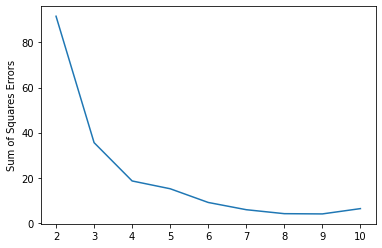

In [18]:
plt.plot(range(2,11),sse)
plt.ylabel("Sum of Squares Errors")

In [19]:
# plt.plot(range(2,11),silhouette_scorea)

From above we can see that the optimal number of clusters is 3, however the number of data points in this cluster is very less and hence we have merged it with other cluster (only 2 clusters)

In [21]:
kmeans = KMeans(
         init="random",
         n_clusters=2,
         n_init=10,
         max_iter=300)

In [22]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [23]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [24]:
newdf['kmeans labels']=kmeans.labels_

In [73]:
newdf[['Installed Capacity (MW)','kmeans labels']].groupby(['kmeans labels'],as_index=False).agg({'Installed Capacity (MW)':'mean'}).head()

,kmeans labels,Installed Capacity (MW)
0,0,1211.306000
1,1,55.156758


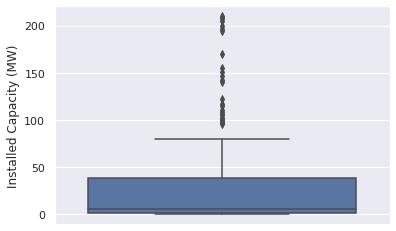

In [ ]:
#sns.boxplot(y=newdf[newdf["kmeans labels"]==2]["Installed Capacity (MW)"])

### DBSCAN for clustering

In [ ]:
# from sklearn.cluster import DBSCAN

In [ ]:
# for i in range(1,30):
#   db=DBSCAN(eps=0.3,min_samples=i).fit(X)
#   print(len(set(db.labels_)))

In [ ]:
# from sklearn.neighbors import NearestNeighbors
# neigh = NearestNeighbors(n_neighbors=2)
# nbrs = neigh.fit(X)
# distances, indices = nbrs.kneighbors(X)
# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# plt.plot(distances)

In [ ]:
# newdf[['Installed Capacity (MW)','kmeans labels']].groupby(['kmeans labels'],as_index=False).agg({'Installed Capacity (MW)':'count'}).head()


,kmeans labels,Installed Capacity (MW)
0,0,10
1,1,273


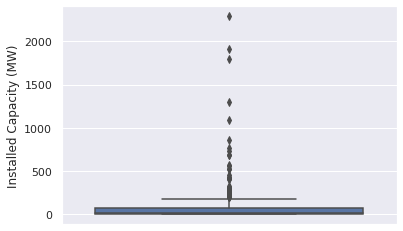

In [ ]:
# sns.boxplot(y=newdf["Installed Capacity (MW)"])

Uncomment for using various thresholds for regression models. We used this to improve accuracy during training.

In [25]:
# mytempdf = newdf
#Setting threshold for minsize plant
# newdf=newdf[newdf['Installed Capacity (MW)']>1]
# newdf

Taking Log output since distribution is lognormal

In [27]:
# from here
newdf['log output']=list(np.log(newdf['Installed Capacity (MW)']))
newdf

,Unnamed: 0,Location (District),Population,Installed Capacity (MW),Latitude,Longitude,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption in KWh,Solar Rad Monthly,Solar Rad Annual,poa monthly,allsky_insolation,Avg Poa Monthly,kmeans labels,log output
0,0,Aalo,NaN,0.05,28.170120,94.798230,4.00,703.0,"[3.999358654022217, 3.6590754985809326, 3.6333...",4.204289,"[123.98011779785156, 102.45411682128906, 112.6...",3.358,128.006210,1,-2.995732
1,1,Abali,NaN,0.01,30.458560,78.250090,4.00,703.0,"[5.87696647644043, 5.861727237701416, 6.584075...",5.881289,"[182.1859588623047, 164.12835693359375, 204.10...",4.622,178.823427,1,-4.605170
2,3,Adilabad,NaN,228.00,19.666670,78.533330,9.50,1896.0,"[6.148787975311279, 6.589134216308594, 6.79743...",5.831581,"[190.6124267578125, 184.49575805664062, 210.72...",5.076,177.183739,1,5.429346
3,4,Agar Malwa,NaN,58.77,23.825024,76.072969,6.50,1084.0,"[5.8297810554504395, 6.8476409912109375, 7.099...",5.992356,"[180.72320556640625, 191.73394775390625, 220.0...",4.952,182.013898,1,4.073632
4,5,Ahmedabad,NaN,10.51,23.027760,72.600270,5.00,2378.0,"[6.179914951324463, 6.704948425292969, 7.12015...",6.023422,"[191.57736206054688, 187.73855590820312, 220.7...",5.242,183.015671,1,2.352327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,305,mukatsar sahib,NaN,2.00,30.297968,74.540631,7.30,2046.0,"[4.280056476593018, 5.305939197540283, 6.57693...",5.652767,"[132.68174743652344, 148.56629943847656, 203.8...",4.784,171.950844,1,0.693147
279,306,sangrur,NaN,2.50,30.246080,75.846860,7.30,2046.0,"[4.1143412590026855, 5.412136077880859, 6.4589...",5.530841,"[127.5445785522461, 151.53981018066406, 200.22...",4.802,168.179098,1,0.916291
280,307,siang,NaN,0.01,22.600000,83.050000,4.00,703.0,"[5.998735427856445, 6.5158185958862305, 6.8137...",5.672237,"[185.96080017089844, 182.4429168701172, 211.22...",4.882,172.343159,1,-4.605170
281,308,"sodhiaya, zirakpur",NaN,1.25,30.658350,76.820920,7.30,2046.0,"[4.3935980796813965, 5.415832996368408, 6.3008...",5.663244,"[136.2015380859375, 151.64332580566406, 195.32...",4.818,172.205873,1,0.223144


Density plots of Installed Capacity (MW) and it's log outputs

No handles with labels found to put in legend.


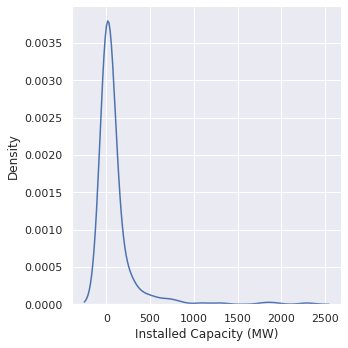

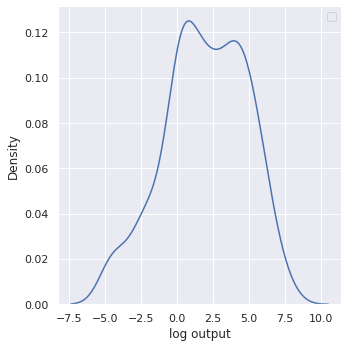

In [28]:
import seaborn as sns
sns.set()
with sns.axes_style(style=None):
  sns.displot(newdf['Installed Capacity (MW)'],kind='kde')
  sns.displot(newdf['log output'],kind='kde')
  plt.legend()
  plt.show()

In [33]:
from scipy import stats
distributions=[stats.weibull_min,stats.norm,stats.weibull_max,
              stats.invgauss,stats.uniform,stats.gamma,stats.expon,   
              stats.lognorm,stats.pearson3,stats.triang,stats.rayleigh]
dist_names = ['weibull_min','norm','weibull_max',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang','rayleigh']
#sns.displot(df["Solar Rad Annual"])

## STATISTICAL TESTS

In [35]:
def myfun(name,dist_names,newdf,distributions):
  for i in range(len(dist_names)):
    print("The well known distribution against which kstest is performed is"+" "+dist_names[i])
    newdf=newdf[~newdf[name].isnull()]
    args=distributions[i].fit(list(map(float,list(newdf[name]))))
    print(stats.kstest(list(map(float,list(newdf[name]))),dist_names[i],args=args)[1])
myfun('Installed Capacity (MW)',dist_names,newdf[newdf['Installed Capacity (MW)']>0.75],distributions)

The well known distribution against which kstest is performed is weibull_min
0.0763377419145487
The well known distribution against which kstest is performed is norm
1.2640213949019155e-24
The well known distribution against which kstest is performed is weibull_max
4.858451502259355e-206
The well known distribution against which kstest is performed is invgauss
8.331268205454197e-07
The well known distribution against which kstest is performed is uniform
4.062493603943635e-152
The well known distribution against which kstest is performed is gamma
0.0050947786567708785
The well known distribution against which kstest is performed is expon
1.8275123328855e-31
The well known distribution against which kstest is performed is lognorm
0.13365375612047128
The well known distribution against which kstest is performed is pearson3
6.745322512133951e-15
The well known distribution against which kstest is performed is triang
5.596050588675253e-115
The well known distribution against which kstest is

In [36]:
print(stats.kstest(np.log(newdf['Installed Capacity (MW)']),'norm',args=(np.log(newdf['Installed Capacity (MW)']).mean(),np.log(newdf['Installed Capacity (MW)']).std())))

KstestResult(statistic=0.06510099672972569, pvalue=0.17386841155391364)


## Creating a new dataframe with normalized values

In [37]:
import pandas as pd
from sklearn import preprocessing
#cols.append('log output')
x = newdf[cols3].values #returns a numpy array
Standard_scaler = preprocessing.StandardScaler()
x_scaled = Standard_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns=newdf[cols3].columns

In [38]:
df['Installed Capacity (MW)']=list(newdf["Installed Capacity (MW)"])
df['log output']=list(newdf['log output'])
#df['kmeans labels']=newdf['kmeans labels']
print(newdf["Installed Capacity (MW)"])

0        0.05
1        0.01
2      228.00
3       58.77
4       10.51
        ...  
278      2.00
279      2.50
280      0.01
281      1.25
282      5.43
Name: Installed Capacity (MW), Length: 283, dtype: float64


In [29]:
# newdf=newdf[newdf["kmeans labels"]==2].reset_index()
# newdf

## ASSIGNING LABELS MANUALLY FOR CLUSTERING

In [30]:
labels=[]
mydic={'0':0,'1':0,'2':0,'3':0}
for index,row in newdf.iterrows():
  if row['Installed Capacity (MW)'] < 5:
    labels.append(0)
  elif row['Installed Capacity (MW)'] >= 5 and row['Installed Capacity (MW)'] < 100:
    labels.append(1)
  elif row['Installed Capacity (MW)'] >= 100:
    labels.append(2)
  #elif row['Installed Capacity (MW)'] >= 250:
  #  labels.append(3)
for i in labels:
  for key in mydic.keys():
    if key == str(i):
      mydic[key]+=1
mydic

{'0': 124, '1': 101, '2': 58, '3': 0}

In [39]:
df['labels']=labels

In [40]:
df.corr(method='spearman')

,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption in KWh,Solar Rad Annual,Avg Poa Monthly,allsky_insolation,Installed Capacity (MW),log output,labels
Average domestic electricity rates in Rs./KWh,1.000000,0.017940,0.092995,0.094048,0.187206,0.175076,0.175076,0.111976
Per capita electricity consumption in KWh,0.017940,1.000000,0.345430,0.345519,0.488435,0.314567,0.314567,0.215916
Solar Rad Annual,0.092995,0.345430,1.000000,0.999657,0.817652,0.428754,0.428754,0.362468
Avg Poa Monthly,0.094048,0.345519,0.999657,1.000000,0.817478,0.426442,0.426442,0.360142
allsky_insolation,0.187206,0.488435,0.817652,0.817478,1.000000,0.423428,0.423428,0.345206
Installed Capacity (MW),0.175076,0.314567,0.428754,0.426442,0.423428,1.000000,1.000000,0.928911
log output,0.175076,0.314567,0.428754,0.426442,0.423428,1.000000,1.000000,0.928911
labels,0.111976,0.215916,0.362468,0.360142,0.345206,0.928911,0.928911,1.000000


In [ ]:
# def fun(df,i):
#   print("for "+str(i))
#   mean=newdf[df['kmeans labels']==i]['Installed Capacity (MW)'].mean()
#   min=newdf[df['kmeans labels']==i]['Installed Capacity (MW)'].min()
#   max=newdf[df['kmeans labels']==i]['Installed Capacity (MW)'].max()
#   count=newdf[df['kmeans labels']==i]['Installed Capacity (MW)'].count()
#   print("min is "+str(min))
#   print("max is "+str(max))
#   print("mean is "+str(mean))
#   print("count is "+str(count))
# for i in range(4):
#   fun(df,i)

for 0
min is nan
max is nan
mean is nan
count is 0
for 1
min is nan
max is nan
mean is nan
count is 0
for 2
min is 0.01
max is 210.0
mean is 27.89126000000001
count is 250
for 3
min is nan
max is nan
mean is nan
count is 0


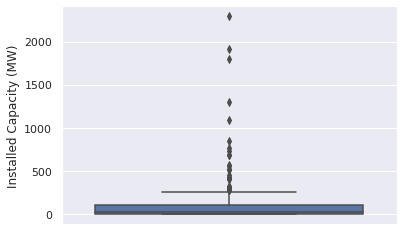

In [ ]:
# tempdf=df[df["Installed Capacity (MW)"]>1]
# sns.boxplot(y=tempdf['Installed Capacity (MW)'])

In [ ]:
# mytempdf=newdf[newdf["Installed Capacity (MW)"]>5]
# mytempdf

,Location (District),Population,Installed Capacity (MW),Latitude,Longitude,Average domestic electricity rates in Rs./KWh,Per capita electricity consumption in KWh,Solar Rad Monthly,Solar Rad Annual,poa monthly,allsky_insolation,Avg Poa Monthly,log output
2,Adilabad,NaN,228.00,19.666670,78.533330,9.50,1896.0,"[6.148787975311279, 6.589134216308594, 6.79743...",5.831581,"[190.6124267578125, 184.49575805664062, 210.72...",5.076,177.183739,5.429346
3,Agar Malwa,NaN,58.77,23.825024,76.072969,6.50,1084.0,"[5.8297810554504395, 6.8476409912109375, 7.099...",5.992356,"[180.72320556640625, 191.73394775390625, 220.0...",4.952,182.013898,4.073632
4,Ahmedabad,NaN,10.51,23.027760,72.600270,5.00,2378.0,"[6.179914951324463, 6.704948425292969, 7.12015...",6.023422,"[191.57736206054688, 187.73855590820312, 220.7...",5.242,183.015671,2.352327
6,Allahabad,NaN,170.00,25.436090,81.847180,7.00,606.0,"[4.9206390380859375, 6.007530689239502, 7.0393...",5.632980,"[152.53981018066406, 168.2108612060547, 218.21...",4.722,171.189050,5.135798
7,Alwar,NaN,7.60,27.556080,76.612360,7.95,1282.0,"[5.059836387634277, 6.111655235290527, 6.73120...",5.737871,"[156.8549346923828, 171.1263427734375, 208.667...",4.838,174.367624,2.028148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Yadgiri,NaN,142.50,13.050440,77.505000,7.50,1396.0,"[6.652213096618652, 7.066847801208496, 7.14111...",5.984282,"[206.21861267089844, 197.87173461914062, 221.3...",5.428,181.777854,4.959342
271,"hakamwala, mansa\rnow\rvector green\rsunshine ...",NaN,20.00,29.790880,75.508640,7.30,2046.0,"[4.333707809448242, 5.529303550720215, 6.45846...",5.606519,"[134.34494018554688, 154.82049560546875, 200.2...",4.830,170.499591,2.995732
273,"khera, mansa",NaN,25.00,24.591760,73.755190,7.30,2046.0,"[6.351513862609863, 6.764344692230225, 7.19981...",6.163308,"[196.8969268798828, 189.4016571044922, 223.194...",5.120,187.298217,3.218876
274,"khurd, mansa",NaN,25.00,30.120860,75.121870,7.30,2046.0,"[4.214666843414307, 5.368316173553467, 6.33920...",5.581432,"[130.65467834472656, 150.31285095214844, 196.5...",4.802,169.755250,3.218876


In [ ]:
cols3

['Average domestic electricity rates in Rs./KWh',
 'Per capita electricity consumption in KWh',
 'Solar Rad Annual',
 'Avg Poa Monthly',
 'allsky_insolation']

## CLASSIFICATION MODELS

### Logistic Regression CV

In [ ]:
 from sklearn.linear_model import LogisticRegressionCV
 clf=LogisticRegressionCV(cv=5).fit(df[cols3],df['labels'])
 clf.score(df[cols3],df['labels'])

0.5547703180212014

In [ ]:
clf.predict(df[cols3])

array([0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 1,
       2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

### Neural Nets  

One hot encoding for using in Neural Network

In [41]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(df['labels'].values.reshape(-1,1)).toarray()
# y

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[cols3], y, test_size=0.2)

In [43]:
print(X_train.shape)

(226, 5)


In [44]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
history = model.fit(df[cols3].to_numpy(), y, epochs=200,validation_split=0.2)

Epoch 1/200
8/8 [==============================] - 0s 22ms/step - loss: 1.1512 - accuracy: 0.3274 - val_loss: 1.0918 - val_accuracy: 0.3860
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 1.1260 - accuracy: 0.3496 - val_loss: 1.0571 - val_accuracy: 0.3509
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 1.0901 - accuracy: 0.3673 - val_loss: 1.0342 - val_accuracy: 0.3860
Epoch 4/200
8/8 [==============================] - 0s 3ms/step - loss: 1.0850 - accuracy: 0.3451 - val_loss: 1.0150 - val_accuracy: 0.4561
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 1.0689 - accuracy: 0.3761 - val_loss: 0.9986 - val_accuracy: 0.4737
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 1.0801 - accuracy: 0.4071 - val_loss: 0.9852 - val_accuracy: 0.4912
Epoch 7/200
8/8 [==============================] - 0s 3ms/step - loss: 1.0537 - accuracy: 0.4469 - val_loss: 0.9776 - val_accuracy: 0.4211
Epoch 8/200
8/8 [=========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


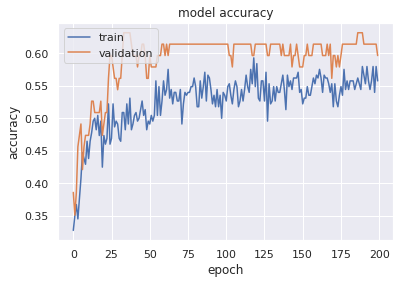

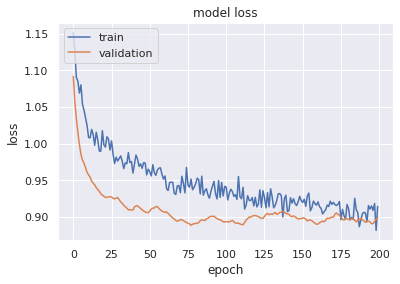

In [47]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [48]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

We can see that this model outperforms the previous logistic regression CV

In [49]:
from sklearn.metrics import accuracy_score, f1_score
a = accuracy_score(pred,test)
print('Accuracy is: ', a*100)
print('F1 score is: ', f1_score(test,pred,average='micro'))
print('F1 score is: ', f1_score(test,pred,average='macro'))
# print('F1 score is: ', f1_score(test,pred,average='None'))

Accuracy is:  66.66666666666666
F1 score is:  0.6666666666666666
F1 score is:  0.6075036075036075


In [ ]:
# cols4=['Average domestic electricity rates in Rs./KWh',
#  'Per capita electricity consumption in KWh',
#  'Solar Rad Annual',
#  'allsky_insolation']

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df[cols3], df['Installed Capacity (MW)'], test_size=0.2)

## Predicting for remaining Districts using this model

In [ ]:
predictnewdf=pd.read_csv('AllDistricts_Data.csv')
predictnewdf

,Unnamed: 0,objectid,State,District,st_area(sh,st_length(,geometry,Longitude,Latitude,SolarRadiationAnnual,POA-Montly,Avg Domestic Electricity Rates (in Rs./KWh),Per Capita Electricity Consumption (in KWh),allsky_insolation
0,0,1,Maharashtra,Jalgaon,1.353967e+10,8.464308e+05,"POLYGON ((75.23334519067033 21.41480953559289,...",75.525927,20.843512,5.975435,181.525902,8.91,1424,"[5.19, 5.06, 5.12, 5.07, 4.96]"
1,1,2,Maharashtra,Nashik,1.771358e+10,9.720056e+05,"POLYGON ((74.13013381299649 20.86311429677081,...",73.790236,20.011247,5.987553,181.879634,8.91,1424,"[5.09, 4.94, 5.04, 5.04, 4.87]"
2,2,3,Maharashtra,Chandrapur,1.294532e+10,7.410244e+05,"POLYGON ((79.7575537026844 20.73462226435134, ...",79.358139,20.030976,5.835518,177.284105,8.91,1424,"[5.16, 5.12, 5.15, 4.98, 4.96]"
3,3,4,Maharashtra,Yavatmal,1.547940e+10,1.014942e+06,"POLYGON ((78.26132288530391 20.69734885711211,...",78.116914,20.325704,5.894222,179.103247,8.91,1424,"[5.15, 5.11, 5.13, 4.96, 4.92]"
4,4,5,Maharashtra,Nanded,1.186387e+10,1.131732e+06,"POLYGON ((78.05386547119404 19.92451783594126,...",77.291412,19.172572,5.958775,181.044062,8.91,1424,"[5.2, 5.11, 5.19, 5.05, 4.96]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,722,723,Arunachal Pradesh,West Siang,1.749736e+09,2.368891e+05,"POLYGON ((94.50647173132498 28.34824477308008,...",94.550000,28.400000,3.651414,111.305860,4.00,703,"[3.36, 3.46, 3.39, 3.31, 3.27]"
723,723,724,Arunachal Pradesh,Lepa Rada,1.075264e+09,1.592522e+05,"POLYGON ((94.62562290876461 28.05551135977154,...",94.740936,27.921127,4.287032,130.475633,4.00,703,"[3.92, 3.93, 3.95, 3.91, 3.83]"
724,724,725,Arunachal Pradesh,Kamle,1.672421e+09,2.560257e+05,"POLYGON ((93.96886324898708 27.97757855825465,...",94.096466,27.731233,4.288928,130.546933,4.00,703,"[3.92, 3.93, 3.95, 3.91, 3.83]"
725,725,726,Jammu and Kashmir,Muzaffarabad,6.956020e+09,5.957899e+05,"POLYGON ((74.53921514615284 35.05906271016584,...",73.470241,34.373475,5.441101,165.777060,3.50,1322,"[4.13, 4.51, 4.36, 4.4, 4.1]"


A little cleaning of this dataset same steps as before

In [ ]:
predictpoamonthlyavg=[]
for i,row in predictnewdf.iterrows():
  temp=row['POA-Montly']
  # print(temp)
  # print(type(temp))
  # str1 = temp.replace(']','').replace('[','')
  # l = str1.replace('"','').split(",")
  # l = list(map(float, l))
  predictpoamonthlyavg.append(temp)
predictnewdf['Avg Poa Monthly']=predictpoamonthlyavg

In [ ]:
predictallskyavg=[]
for i,row in predictnewdf.iterrows():
  temp=row['allsky_insolation']
  str1 = temp.replace(']','').replace('[','')
  l = str1.replace('"','').split(",")
  l = list(map(float, l))
  predictallskyavg.append(Average(l))
predictnewdf['allsky_insolation']=predictallskyavg

In [ ]:
predictnewdf

,Unnamed: 0,objectid,State,District,st_area(sh,st_length(,geometry,Longitude,Latitude,SolarRadiationAnnual,POA-Montly,Avg Domestic Electricity Rates (in Rs./KWh),Per Capita Electricity Consumption (in KWh),allsky_insolation,Avg Poa Monthly
0,0,1,Maharashtra,Jalgaon,1.353967e+10,8.464308e+05,"POLYGON ((75.23334519067033 21.41480953559289,...",75.525927,20.843512,5.975435,181.525902,8.91,1424,5.080,181.525902
1,1,2,Maharashtra,Nashik,1.771358e+10,9.720056e+05,"POLYGON ((74.13013381299649 20.86311429677081,...",73.790236,20.011247,5.987553,181.879634,8.91,1424,4.996,181.879634
2,2,3,Maharashtra,Chandrapur,1.294532e+10,7.410244e+05,"POLYGON ((79.7575537026844 20.73462226435134, ...",79.358139,20.030976,5.835518,177.284105,8.91,1424,5.074,177.284105
3,3,4,Maharashtra,Yavatmal,1.547940e+10,1.014942e+06,"POLYGON ((78.26132288530391 20.69734885711211,...",78.116914,20.325704,5.894222,179.103247,8.91,1424,5.054,179.103247
4,4,5,Maharashtra,Nanded,1.186387e+10,1.131732e+06,"POLYGON ((78.05386547119404 19.92451783594126,...",77.291412,19.172572,5.958775,181.044062,8.91,1424,5.102,181.044062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,722,723,Arunachal Pradesh,West Siang,1.749736e+09,2.368891e+05,"POLYGON ((94.50647173132498 28.34824477308008,...",94.550000,28.400000,3.651414,111.305860,4.00,703,3.358,111.305860
723,723,724,Arunachal Pradesh,Lepa Rada,1.075264e+09,1.592522e+05,"POLYGON ((94.62562290876461 28.05551135977154,...",94.740936,27.921127,4.287032,130.475633,4.00,703,3.908,130.475633
724,724,725,Arunachal Pradesh,Kamle,1.672421e+09,2.560257e+05,"POLYGON ((93.96886324898708 27.97757855825465,...",94.096466,27.731233,4.288928,130.546933,4.00,703,3.908,130.546933
725,725,726,Jammu and Kashmir,Muzaffarabad,6.956020e+09,5.957899e+05,"POLYGON ((74.53921514615284 35.05906271016584,...",73.470241,34.373475,5.441101,165.777060,3.50,1322,4.300,165.777060


In [ ]:
predictcols=['Avg Domestic Electricity Rates (in Rs./KWh)','Per capita electricity consumption in KWh','SolarRadiationAnnual','Avg Poa Monthly']

In [ ]:
# temp = predictnewdf['poa monthly'].iloc[0]
# str1 = temp.replace(']','').replace('[','')
# l = str1.replace('"','').split(",")
# l = list(map(float, l))
# print(Average(l))

In [ ]:
predictnewdf[['Avg Poa Monthly','SolarRadiationAnnual']]=predictnewdf[['Avg Poa Monthly','SolarRadiationAnnual']].apply(pd.to_numeric)

In [ ]:
predictnewdf

,Unnamed: 0,objectid,State,District,st_area(sh,st_length(,geometry,Longitude,Latitude,SolarRadiationAnnual,POA-Montly,Avg Domestic Electricity Rates (in Rs./KWh),Per Capita Electricity Consumption (in KWh),allsky_insolation,Avg Poa Monthly
0,0,1,Maharashtra,Jalgaon,1.353967e+10,8.464308e+05,"POLYGON ((75.23334519067033 21.41480953559289,...",75.525927,20.843512,5.975435,181.525902,8.91,1424,5.080,181.525902
1,1,2,Maharashtra,Nashik,1.771358e+10,9.720056e+05,"POLYGON ((74.13013381299649 20.86311429677081,...",73.790236,20.011247,5.987553,181.879634,8.91,1424,4.996,181.879634
2,2,3,Maharashtra,Chandrapur,1.294532e+10,7.410244e+05,"POLYGON ((79.7575537026844 20.73462226435134, ...",79.358139,20.030976,5.835518,177.284105,8.91,1424,5.074,177.284105
3,3,4,Maharashtra,Yavatmal,1.547940e+10,1.014942e+06,"POLYGON ((78.26132288530391 20.69734885711211,...",78.116914,20.325704,5.894222,179.103247,8.91,1424,5.054,179.103247
4,4,5,Maharashtra,Nanded,1.186387e+10,1.131732e+06,"POLYGON ((78.05386547119404 19.92451783594126,...",77.291412,19.172572,5.958775,181.044062,8.91,1424,5.102,181.044062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,722,723,Arunachal Pradesh,West Siang,1.749736e+09,2.368891e+05,"POLYGON ((94.50647173132498 28.34824477308008,...",94.550000,28.400000,3.651414,111.305860,4.00,703,3.358,111.305860
723,723,724,Arunachal Pradesh,Lepa Rada,1.075264e+09,1.592522e+05,"POLYGON ((94.62562290876461 28.05551135977154,...",94.740936,27.921127,4.287032,130.475633,4.00,703,3.908,130.475633
724,724,725,Arunachal Pradesh,Kamle,1.672421e+09,2.560257e+05,"POLYGON ((93.96886324898708 27.97757855825465,...",94.096466,27.731233,4.288928,130.546933,4.00,703,3.908,130.546933
725,725,726,Jammu and Kashmir,Muzaffarabad,6.956020e+09,5.957899e+05,"POLYGON ((74.53921514615284 35.05906271016584,...",73.470241,34.373475,5.441101,165.777060,3.50,1322,4.300,165.777060


In [ ]:
# predictcols2=['Installed Capacity (MW)']
predictcols3=['Avg Domestic Electricity Rates (in Rs./KWh)','Per Capita Electricity Consumption (in KWh)','SolarRadiationAnnual','Avg Poa Monthly', 'allsky_insolation']
# predictdata=predictnewdf[predictcols2]
# predictdata.head()

In [ ]:
# predictnewdf['log output']=list(np.log(predictnewdf['Installed Capacity (MW)']))
# predictnewdf


## Predicting the labels for remaining district using neural network model

In [ ]:
import pandas as pd
from sklearn import preprocessing
#cols.append('log output')
x = predictnewdf[predictcols3].values #returns a numpy array
Standard_scaler = preprocessing.StandardScaler()
x_scaled = Standard_scaler.fit_transform(x)
predictdf = pd.DataFrame(x_scaled)
predictdf.columns=predictnewdf[predictcols3].columns

In [ ]:
# predictdf[predictcols3].to_numpy().shape

y_pred = model.predict(predictdf[predictcols3].to_numpy())
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [ ]:
print(pred)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 

In [ ]:
predictnewdf['Predicted Labels'] = pred
predictnewdf

,Unnamed: 0,objectid,State,District,st_area(sh,st_length(,geometry,Longitude,Latitude,SolarRadiationAnnual,POA-Montly,Avg Domestic Electricity Rates (in Rs./KWh),Per Capita Electricity Consumption (in KWh),allsky_insolation,Avg Poa Monthly,Predicted Labels
0,0,1,Maharashtra,Jalgaon,1.353967e+10,8.464308e+05,"POLYGON ((75.23334519067033 21.41480953559289,...",75.525927,20.843512,5.975435,181.525902,8.91,1424,5.080,181.525902,2
1,1,2,Maharashtra,Nashik,1.771358e+10,9.720056e+05,"POLYGON ((74.13013381299649 20.86311429677081,...",73.790236,20.011247,5.987553,181.879634,8.91,1424,4.996,181.879634,2
2,2,3,Maharashtra,Chandrapur,1.294532e+10,7.410244e+05,"POLYGON ((79.7575537026844 20.73462226435134, ...",79.358139,20.030976,5.835518,177.284105,8.91,1424,5.074,177.284105,2
3,3,4,Maharashtra,Yavatmal,1.547940e+10,1.014942e+06,"POLYGON ((78.26132288530391 20.69734885711211,...",78.116914,20.325704,5.894222,179.103247,8.91,1424,5.054,179.103247,2
4,4,5,Maharashtra,Nanded,1.186387e+10,1.131732e+06,"POLYGON ((78.05386547119404 19.92451783594126,...",77.291412,19.172572,5.958775,181.044062,8.91,1424,5.102,181.044062,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,722,723,Arunachal Pradesh,West Siang,1.749736e+09,2.368891e+05,"POLYGON ((94.50647173132498 28.34824477308008,...",94.550000,28.400000,3.651414,111.305860,4.00,703,3.358,111.305860,0
723,723,724,Arunachal Pradesh,Lepa Rada,1.075264e+09,1.592522e+05,"POLYGON ((94.62562290876461 28.05551135977154,...",94.740936,27.921127,4.287032,130.475633,4.00,703,3.908,130.475633,0
724,724,725,Arunachal Pradesh,Kamle,1.672421e+09,2.560257e+05,"POLYGON ((93.96886324898708 27.97757855825465,...",94.096466,27.731233,4.288928,130.546933,4.00,703,3.908,130.546933,0
725,725,726,Jammu and Kashmir,Muzaffarabad,6.956020e+09,5.957899e+05,"POLYGON ((74.53921514615284 35.05906271016584,...",73.470241,34.373475,5.441101,165.777060,3.50,1322,4.300,165.777060,1


In [ ]:
predictnewdf.to_csv('FinalPredicted.csv')

## Regression Models

In [ ]:
# import statsmodels.api as sm
# cols31=['Average domestic electricity rates in Rs./KWh']
# X=df[cols3]
# X_1 = sm.add_constant(X)
# model_=sm.OLS(df['log output'],X_1).fit()
# model_.pvalues

const                                            7.391114e-70
Average domestic electricity rates in Rs./KWh    2.098379e-02
Per capita electricity consumption in KWh        6.934664e-01
Solar Rad Annual                                 2.982182e-01
Avg Poa Monthly                                  3.033529e-01
allsky_insolation                                1.063115e-01
dtype: float64

In [50]:
df=df[df['Installed Capacity (MW)']>0.75]

## Generalized Linear Model

In [53]:
 # Poisson regression code
 import statsmodels.api as sm
 from sklearn.metrics import mean_squared_error, r2_score
 from sklearn.model_selection import KFold
 #X_train, X_test, y_train, y_test = train_test_split(df[cols3], df['Installed Capacity (MW)'], test_size=0.2)
 X=df[cols3].values
 y=df['Installed Capacity (MW)'].to_numpy()
 temp=[]
 cv = KFold(n_splits=5, shuffle=True)
 for train_index,test_index in cv.split(X):
     X_train,X_test=X[train_index],X[test_index]
     y_train,y_test=y[train_index],y[test_index]
     exog, endog = sm.add_constant(X_train), y_train
     mod = sm.GLM(endog, exog,
                 family=sm.families.Gaussian(link=sm.families.links.log))
     res = mod.fit()
     #print(res.summary())
     y_pred=res.predict(sm.add_constant(X_train))
     temp.append(r2_score(y_train,y_pred))
 print(Average(temp))

0.23533987402408166


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: Deprecation

In [54]:
# #Backward Elimination
# cols = cols3
# pmax = 1
# while (len(cols)>0):
#     p= []
#     X_1 = X[cols]
#     X_1 = sm.add_constant(X_1)
#     model = sm.OLS(y,X_1).fit()
#     p = pd.Series(model.pvalues.values[1:],index = cols)      
#     pmax = max(p)
#     feature_with_p_max = p.idxmax()
#     if(pmax>0.05):
#         cols.remove(feature_with_p_max)
#     else:
#         break

In [55]:
cols4=['Average domestic electricity rates in Rs./KWh',
 'Per capita electricity consumption in KWh',
 'Solar Rad Annual',
 'Avg Poa Monthly']

## Multi-variate Polynomial Regression

In [76]:
import pandas as pd
from sklearn import preprocessing
#cols.append('log output')
x = newdf[cols3].values #returns a numpy array
Standard_scaler = preprocessing.StandardScaler()
x_scaled = Standard_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns=newdf[cols3].columns

In [77]:
df['Installed Capacity (MW)']=list(newdf["Installed Capacity (MW)"])
df['log output']=list(newdf['log output'])
#df['kmeans labels']=newdf['kmeans labels']
print(newdf["Installed Capacity (MW)"])

0        0.05
1        0.01
2      228.00
3       58.77
4       10.51
        ...  
278      2.00
279      2.50
280      0.01
281      1.25
282      5.43
Name: Installed Capacity (MW), Length: 283, dtype: float64


## Finding the best degree for polynomial multivariate regression

In [78]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
X=df[cols3].to_numpy()
y=df['log output'].to_numpy()
temp=[]
for i in range(1,10):
  print(i)
  polynomial_features= PolynomialFeatures(degree=i,interaction_only=False,include_bias=True)
  x_poly = polynomial_features.fit_transform(X)
  cv = KFold(n_splits=5, random_state=10, shuffle=True)
  #x_poly_test = polynomial_features.fit_transform(X_test)
  model = LinearRegression()
  for train_index,test_index in cv.split(x_poly):
    x_train_poly,x_test_poly=x_poly[train_index],x_poly[test_index]
    y_train,y_test=y[train_index],y[test_index]

    model.fit(x_train_poly, y_train)
  #scores = cross_val_score(model, x_poly, y, scoring='accuracy', cv=cv, n_jobs=-1)
    y_poly_pred = model.predict(x_test_poly)

  #rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
    r2 = r2_score(y_test,y_poly_pred)
  #print(rmse)
    temp.append(r2)
  print(Average(temp))
  temp=[]
  #print(mean(scores))

1
0.25636846552804393
2
0.196398830426434
3
-1.0964486809063616
4
-14611.643511697668
5
-3.3992973588727532e+16
6
-1.4836365629996776e+22
7
-1.5453602590973644e+22
8
-3.799454721723169e+19
9
-9.903691436342725e+20


In [79]:
#print(model.score(x_poly_test,y_test))

NameError: ignored

## Training best degree polynomial multivariate regression

In [81]:
X_train,X_test,y_train,y_test=train_test_split(df[cols3], df['Installed Capacity (MW)'], test_size=0.2)
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)
model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly_test)

In [82]:
print(y_poly_pred)

[ 1.49029724e+02  3.15912154e+01  2.78727775e+02  5.00614350e+01
  1.89480419e+02  1.94879798e+01  1.60667660e+02  8.78601861e+01
 -1.91979834e+01  1.22873379e+00  1.39872862e+02  2.72571140e+02
  1.49781738e+01  3.49000323e+01  1.93413481e+02 -1.74389994e+01
  6.96014731e+01 -1.74393697e+01  1.49781738e+01  1.56755667e+02
  2.63958226e+02  2.13928341e+01  5.04972577e+02  2.54723744e+02
  1.79642930e+01 -3.97967786e+01  1.78758346e+02  2.06052311e+02
  3.15912154e+01 -2.28839714e+01  4.07577665e+00  2.48701219e+01
  2.71567572e+01  1.22177897e+01  2.01633093e+02 -1.74403675e+01
  1.32886340e+02  6.11686401e+00  3.49239724e+01  6.12722745e+01
 -3.52315787e+01  3.87549828e-02  2.40870775e+02  7.93234449e+00
  1.10867938e+02  1.31945484e+02  1.43641335e+02  1.74572379e+02
  5.00555334e+01 -4.34061663e+01  5.19198591e+02  4.83081853e+01
  5.33942476e+01 -8.11764381e+01  4.29050951e+00  7.85122459e+01
 -6.93484937e+00]


### Converting predicted values back to their exponent to give exact Installed Capacity

In [83]:
print(np.exp(y_poly_pred))

[5.28185710e+064 5.24675173e+013 1.12184948e+121 5.51321548e+021
 1.95119325e+082 2.90751585e+008 5.98519482e+069 1.43613085e+038
 4.59644141e-009 3.41690029e+000 5.57201194e+060 2.37761757e+118
 3.19844024e+006 1.43513073e+015 9.96340307e+083 2.66893980e-008
 1.68863462e+030 2.66795167e-008 3.19844024e+006 1.19707403e+068
 4.32116609e+114 1.95339381e+009 2.02676580e+219 4.21809496e+110
 6.33568136e+007 5.20569446e-018 4.30291806e+077 3.07172094e+089
 5.24675173e+013 1.15243782e-010 5.88962043e+001 6.32348841e+010
 6.22343012e+011 2.02357186e+005 3.69947047e+087 2.66529099e-008
 5.14996490e+057 4.53440479e+002 1.46990243e+015 4.07577973e+026
 5.00172477e-016 1.03951575e+000 4.06301350e+104 2.78595078e+003
 1.41037244e+048 2.00999774e+057 2.41345428e+062 6.54366073e+075
 5.48077441e+021 1.40909897e-019 3.05550626e+225 9.54944856e+020
 1.54463937e+023 5.56571384e-036 7.30036548e+001 1.25151237e+034
 9.73269661e-004]


In [84]:
#print(y_test.keys())

In [ ]:
# myarr=[]
# for i in y_test.keys():
#   myarr.append(df['Installed Capacity (MW)'].iloc[i])
# print(myarr)

[0.01, 10.51, 12.28, 1.0, 102.0, 110.25, 12.5, 2.0, 40.0, 4.0, 60.63, 47.0, 8.0, 10.0, 0.19, 0.1, 70.0, 10.0, 108.46, 2.5, 104.89, 2.0, 2.0, 0.01, 0.3, 10.0, 3.0, 0.7, 0.07, 0.04, 200.0, 75.0, 6.61, 45.5, 40.0, 4.0, 40.0, 0.01, 5.0, 0.07, 205.0, 0.1, 20.2, 1.58, 45.13, 22.0, 10.0, 1.5, 73.9, 1.0, 15.0, 11.0, 5.55, 0.01, 1.0, 2.0, 59.36, 155.0, 1.0, 4.0, 1.0, 2.0]


In [85]:
# sns.lineplot(x=range(len(myarr)),y=myarr,)
# sns.lineplot(x=range(len(myarr)),y=np.exp(y_poly_pred))
# plt.ylabel("Installed Capacity (MW)")
# plt.legend(['Original','Predicted'])

## Random Forest

In [86]:
X=df[cols3]
X_poly=polynomial_features.fit_transform(X)
y=model.predict(X_poly)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[cols3], df['log output'], test_size=0.2)

In [93]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [94]:
y_train

82     0.000000
234    4.557764
256    1.609438
1     -4.605170
150    0.000000
         ...   
184   -0.941609
58     1.098612
34     1.386294
45     6.001415
271    2.995732
Name: log output, Length: 226, dtype: float64

In [95]:
#y_pred=rf.predict(X_test)
#print(r2_score(y_test,y_pred))
print(Average(cross_val_score(rf,df[cols3],df['log output'])))

0.3886033233439439


In [ ]:
cols3

['Average domestic electricity rates in Rs./KWh',
 'Per capita electricity consumption in KWh',
 'Solar Rad Annual',
 'Avg Poa Monthly',
 'allsky_insolation']

In [ ]:
cols5=['Average domestic electricity rates in Rs./KWh',
 'Solar Rad Annual',
 'Avg Poa Monthly',
 'allsky_insolation']